# Comparison of Model to Assay + Application

In this notebook, I am going to first plot how the output of our model
compares to the experimental data. I then go onto apply our model to 
probe the regulatory potential of all regions upstream of TSSs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models.models as models
%matplotlib inline

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5005)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
model = models.SequenceDNN_Regression.load("models/models/100n1_100n2_8w1_15w2.arch.json", "models/models/100n1_100n2_8w1_15w2.weights.h5")

In [13]:
bases = ['A', 'T', 'C', 'G']

def one_hot_encode_seq(seq):
    if "N" in seq:
        seq = seq.replace("N", "A")
    result = np.zeros((len(bases), len(seq)))
    for i, base in enumerate(seq):
        result[bases.index(base), i] = 1
    return result
    
def seqs_to_encoded_matrix(seqs):
    # Wrangle the data into a shape that Dragonn wants.
    result = np.concatenate(
        map(one_hot_encode_seq, seqs)
    ).reshape(
        len(seqs), 1, len(bases), len(seqs[0])
    )
    
    # Check we actually did the encoding right.
    for i in range(len(seqs)):
        for j in range(len(seqs[0])):
            assert sum(result[i, 0, :, j]) == 1
            
    return result

In [14]:
def quantile_plot(x, y, quantiles = 5000):
    data_pairs = sorted([(i, j) for i, j in zip(x, y)], key = lambda x: x[0])
    avg_activity, avg_score = [], []
    for i in range(0, len(data_pairs), len(data_pairs) / quantiles):
        index = range(i, min(i + (len(data_pairs) / quantiles), len(data_pairs)))
        activities = [data_pairs[j][0] for j in index]
        scores  = [data_pairs[j][1] for j in index]
        avg_activity.append(sum(activities) / float(len(activities)))
        avg_score.append(sum(scores) / float(len(scores)))
    plt.scatter(avg_activity, avg_score)
    plt.show()

# Run Model on experimentally tested sequences

In [ ]:
predictions = model.predict(data.X_one_hot())

In [ ]:
for i in range(4):
    plt.scatter(predictions[:, i], data.y_multitask()[: , i], s = .01)
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in range(4):
    scaler = MinMaxScaler((-1, 1))
    quantile_plot(predictions[:, i], scaler.fit_transform(data.y_multitask()[: , i]))

# Same but only for test set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    data.X_one_hot(), data.y_multitask(), test_size=0.2, random_state=42
)

In [41]:
predictions_valid = model.predict(X_valid)

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.0263964638432


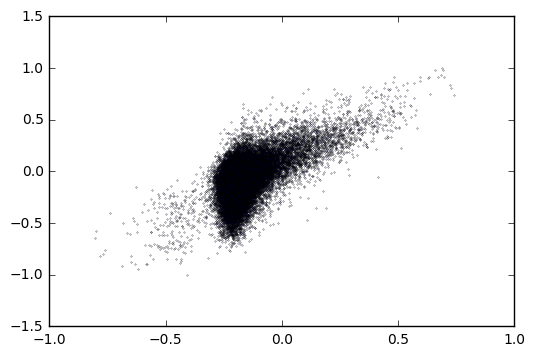

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.0426243876173


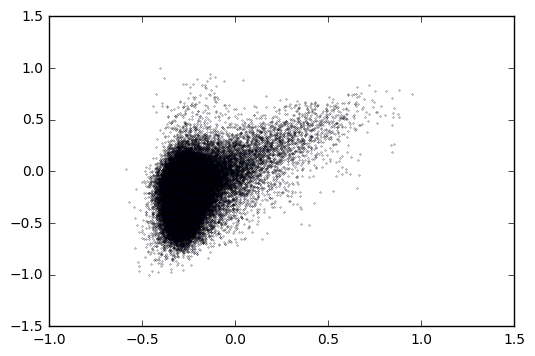

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.0583485692615


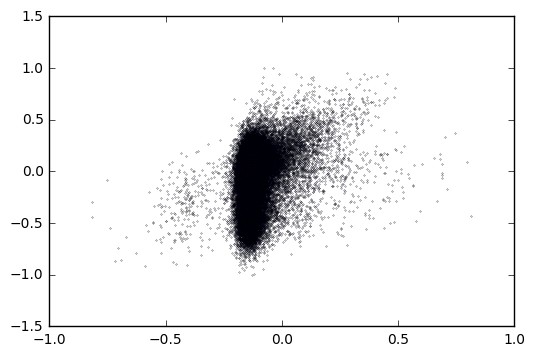

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.104790738415


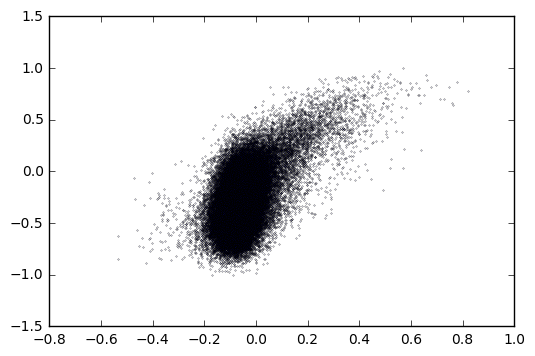

In [44]:

for i in range(4):
    scaler = MinMaxScaler((-1, 1))
    scaled = scaler.fit_transform(y_valid[: , i])
    plt.scatter(predictions_valid[:, i], scaled, s = .05)
    print sum([(i-j)**2 for i, j in zip(predictions_valid[:, i], scaled)]) / float(len(scaled))
    plt.show()

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


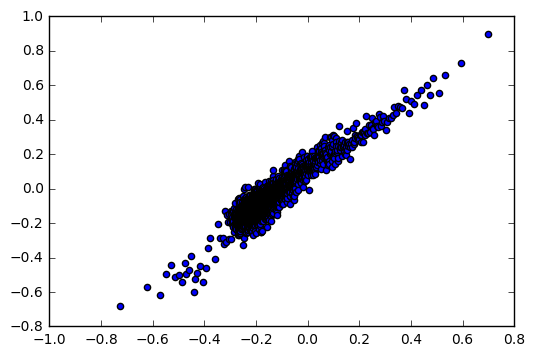

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


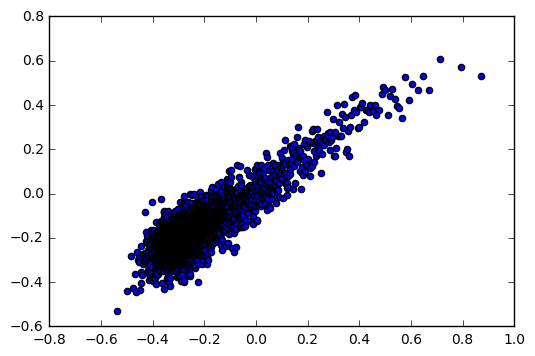

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


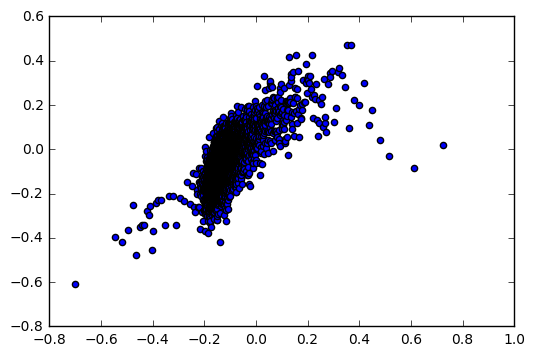

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


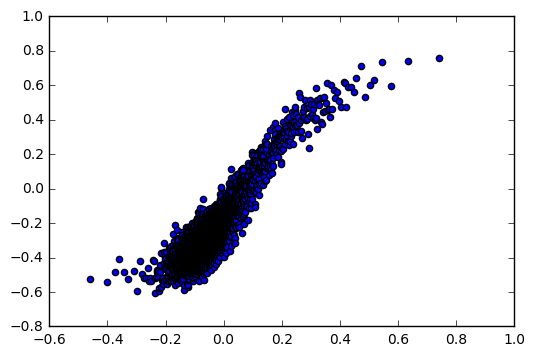

In [43]:
from sklearn.preprocessing import MinMaxScaler
for i in range(4):
    scaler = MinMaxScaler((-1, 1))
    quantile_plot(predictions_valid[:, i], scaler.fit_transform(y_valid[: , i]))

# Run Model on all promoter regions

In [15]:
import gzip
with gzip.open('../data/promoters/hepg2.cage.fa.gz') as f:
    seqs = []
    cage = []
    cur_seq = ''
    region = ''
    for line in f:
        if line[0] == '>':
            if cur_seq:
                seqs += [one_hot_encode_seq(cur_seq)]
            cur_seq = ''
            cage += [int(line[1:].split('.')[0])]
        else:
            cur_seq += line.strip().upper()

In [16]:
vals = []
stride = 29
for shift in range(0, 6000-145, stride):
    X = []
    for seq in seqs[:20000]:
        X += [seq[:, shift:shift+145]]
    X = np.array(X).reshape(len(X), 1, 4, 145)
    vals += [model.predict(X)]

In [17]:
len(vals)

202

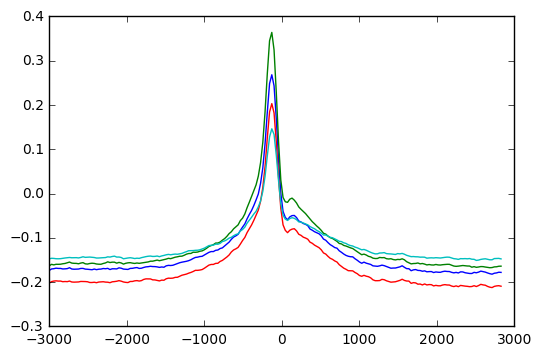

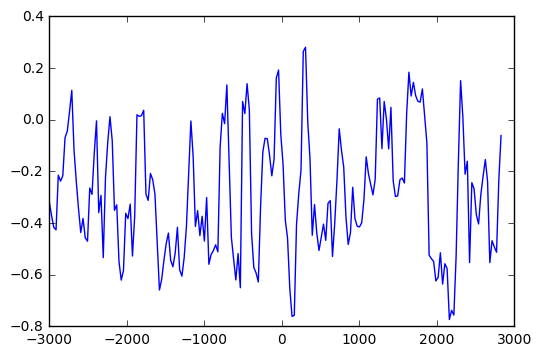

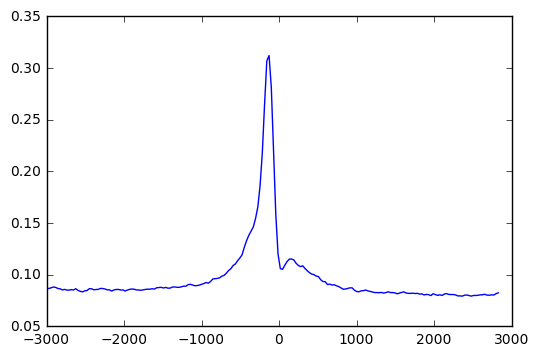

In [19]:
START, END = -3000, 3000

avgs = [sum(x) / float(len(x)) for x in vals]
plt.plot(range(START, END-145, stride), avgs)
plt.show()
meds = [np.median(x[0]) for x in vals]
plt.plot(range(START, END-145, stride), meds)
plt.show()
var = [np.var(x) for x in vals]
plt.plot(range(START, END-145, stride), var)
plt.show()

20000


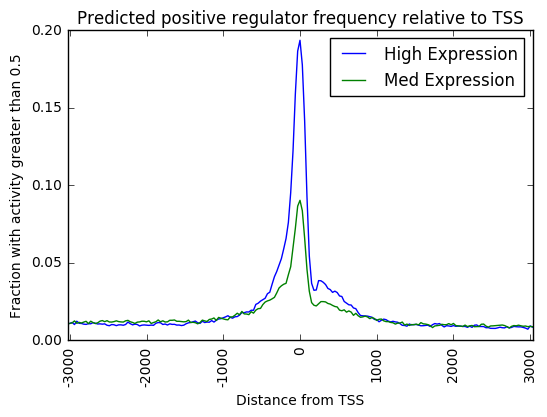

In [37]:
# Add a number of above a given cutoff
print len(vals[0])
thresh1 = [len(filter(lambda y: y[0] > 0.5, x[:10000])) / float(len(x)) for x in vals]
thresh2 = [len(filter(lambda y: y[0] > 0.5, x[10000:])) / float(len(x)) for x in vals]

p1 = plt.plot(range(1, len(range(START, END-145, stride))+1), thresh1, label = 'High Expression')
p2 = plt.plot(range(1, len(range(START, END-145, stride))+1), thresh2, label = 'Med Expression')
plt.xticks(range(1, len(range(0, END-START+1, stride))+1, 33),
           range(START, END+1, 1000), rotation='vertical')
plt.title('Predicted positive regulator frequency relative to TSS')
plt.ylabel('Fraction with activity greater than 0.5')
plt.xlabel('Distance from TSS')
plt.xlim(0, 200)
plt.legend()
plt.show()

20000


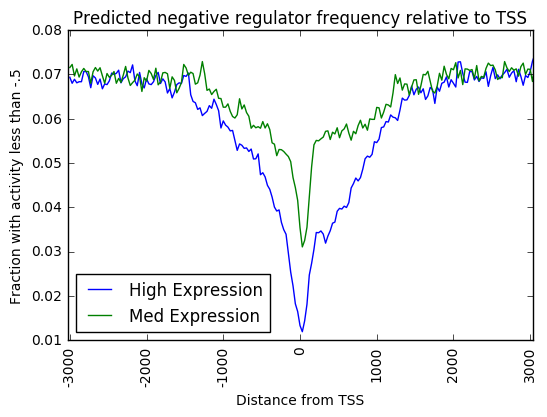

In [42]:
# Add a number of BELOW a given cutoff
print len(vals[0])
thresh1 = [len(filter(lambda y: y[0] < -0.5, x[:10000])) / float(len(x)) for x in vals]
thresh2 = [len(filter(lambda y: y[0] < -0.5, x[10000:])) / float(len(x)) for x in vals]

plt.plot(range(1, len(range(START, END-145, stride))+1), thresh1, label = 'High Expression')
plt.plot(range(1, len(range(START, END-145, stride))+1), thresh2, label = 'Med Expression')
plt.xticks(range(1, len(range(0, END-START+1, stride))+1, 33),
           range(START, END+1, 1000), rotation='vertical')
plt.title('Predicted negative regulator frequency relative to TSS')
plt.ylabel('Fraction with activity less than -.5')
plt.xlabel('Distance from TSS')
plt.xlim(0, 200)
plt.legend(loc = 3)
plt.show()

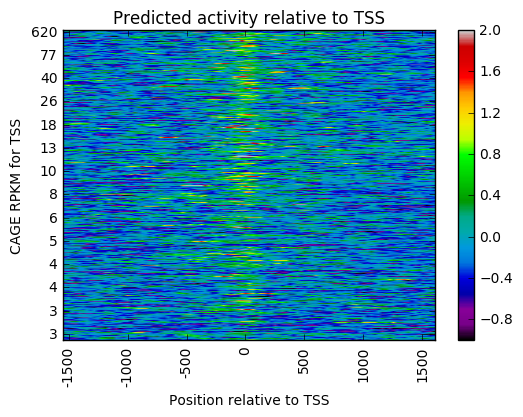

In [170]:
import numpy as np
data = np.vstack([[val[0] for val in rows[:20000]] for rows in vals[50:151]]).T
heatmap = plt.imshow(data, aspect='auto', cmap = 'nipy_spectral')
plt.clim(2,-1)
plt.xticks(range(1, len(range(0, END-START+1, stride*2))+1, 16),
           range(START / 2, END / 2 + 1, 500), rotation='vertical')

plt.yticks(range(100, 20000, 1500), np.array(cage)[range(100, 19999, 1500)])

plt.title('Predicted activity relative to TSS')

plt.ylabel('CAGE RPKM for TSS')
plt.xlabel('Position relative to TSS')
plt.colorbar(heatmap)
plt.show()